# Titanic Disaster Investigation Report

### 1. AIM : *To investigate the Titanic Disaster dataset and find survival patterns through the usage of statistical and visual methods.*

### 1.1 Dataset Available: *titanic-data.csv* (Source: [Kaggle Titanic Training Dataset](https://www.kaggle.com/c/titanic/data) )

The objective is to investigate the above mentioned dataset and find out the likelihood of survival of the passengers abode the Titanic, with respect to various factors. I, through this report, aim to communicate my findings and draw conclusions if possible, with respect to this disaster.

### 1.1.1 Asking Questions

* How many survivors were there and how was their survival affected by gender and age?
* What was the distribution of passenngers across Pclass, and which class had the most number of survivors?
* Was fare correlated to Pclass, and how did it affect survival rates?
* How were travellers aboard the Titanic distributed from the Embarking Stations? Does the embarking point have any correlation to survivors?
* Does the embarking point have any correlation with economic status of the survivors?

### 1.2 Exploring the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
titanic_df = pd.read_csv("titanic-data.csv")

In [4]:
##Looking at first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
##Dataset related information, column wise
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 1.2.1 Data Dictionary (as available on the Kaggle Website):

* *survival* :	Survival	0 = No, 1 = Yes
* *pclass* : 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* *sex* :    	Gender	
* *Age* :    	Age in years	
* *sibsp* :  	# of siblings / spouses aboard the Titanic	
* *parch* :  	# of parents / children aboard the Titanic	
* *ticket* :  	Ticket number	
* *fare* :   	Passenger fare	
* *cabin* :  	Cabin number	
* *embarked* :   Port of Embarkation	
   *C = Cherbourg, 
    Q = Queenstown, 
    S = Southampton*

As it can be seen, a lot of data is available for each of the **891 passengers**, whose data we have the in the dataset. Some factors which can be investigated to find higher survival rates are:

* Age
* Pclass
* Sex
* Cabin
* Ticket

..and so on. These factors will be analysed and evaluated through various statistical and visual methods further in this report to discern whether they actually affected the survival of the passengers on the Titanic. 

In [6]:
##Data related information, column wise
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
##Statistical parameters of the complete dataset
titanic_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mack, Mrs. (Mary)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
##Checking for null/NaN values across the dataset
pd.isnull(titanic_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.2.2 Some points to be noted about the distribution of data:

* The total number of passengers whose data is available is 891, out of which only 38.4% are survivors on average.
* The population mostly comprises of males(577), with a percentage of 65%.
* Out of the three embarking points, Southampton (S) is the place from where more than 70% of passengers embarked.
* Cabins for a majority of passengers are not available(687 null values). Out of the 204 for which it is available, only 147 unique cabins have been alloted, as they were on sharing basis.
* Similarly, age for 177 passengers is not available. For the data, mean age is around 29-30 years, but this may not be very reliable. The oldest passenger is 80 years old, while the youngest is an infant of around 5 months.
* 681 unique tickets have been handed out, for 891 passengers, and yet there is no NULL value for the Ticket column. Hence there is possible duplicacy in tickets.
* Maximum fare paid (512.32) is almost 9.66 standard deviations higher than the mean. It's probably an outlier, while the mean fare paid is 32.2. Surprisingly, minimum fare paid is 0, which could either imply a staff person or someone with a free ticket.

### 1.2 Data Cleaning and corrections

* Passenger Id column serves no purpose to the analysis as it void of any useful information.
* Cabin column is also an hindrance to correct analysis due to lack of complete information over the whole dataset.
* Ticket information has many duplicate values, so this may lead to incorrect analysis. 
* Age column has 714 unique age values, which need to be analysed through discrete intervals having varying interval size. Interval size is kept varying for better age group based analysis.

In [9]:
##Dropping unnecessary columns from dataset 
titanic_corrected_df = titanic_df.drop(["PassengerId", "Cabin", "Ticket"], axis="columns")

In [10]:
titanic_corrected_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
##Creating age ranges using cut function
titanic_corrected_df["Age Interval"] = pd.cut(titanic_corrected_df["Age"], [0, 15, 30, 50, 80])
titanic_corrected_df["Age Interval"].head()

0    (15, 30]
1    (30, 50]
2    (15, 30]
3    (30, 50]
4    (30, 50]
Name: Age Interval, dtype: category
Categories (4, interval[int64]): [(0, 15] < (15, 30] < (30, 50] < (50, 80]]

**Continuous Age data tranformed to categorical data with the below mentioned age ranges:**
* 0-15  -> Kids
* 15-30 -> Adults
* 30-50 -> Middle-Aged
* 50-80 -> Senior Citizens

## 2. Data Analysis

Various factors from the dataset may have influenced the survival chances of a passenger. The analysis for each is done seperately.

### 2.1 One Dimensional Analysis

#### 2.1.1. Survival vs Sex
During such disasters, safety of women is given a priority. 

In [12]:
data_by_sex = titanic_corrected_df[["Sex", "Survived"]]
print(data_by_sex.groupby(by="Sex", as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


Clearly, **74%** of the female passengers survived, while the number is a meagre **18%** for male passengers.

#### 2.1.2. Survival vs Economic status
Economic status in this case, can be governed by the class in which the passenger were travelling. It is may be the case that the higher economic status passengers were evacuated in higher numbers before others.

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


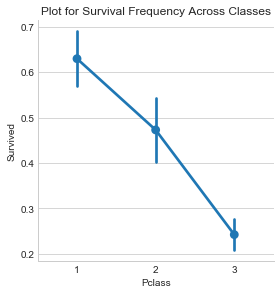

In [15]:
data_by_pclass = titanic_corrected_df[["Pclass", "Survived"]]
print(data_by_pclass.groupby(by="Pclass", as_index=False).mean())
g = sns.factorplot(y="Survived", x="Pclass", data=data_by_pclass, size=4)
g.ax.set_title("Plot for Survival Frequency Across Classes")

As the numbers suggest, around **63%** of the 1st class passengers survived, and the percentage keeps decreasing by class. It may also be the case that passenger count in each class might be different, hence it would valuable to look at the total passengers in each class.

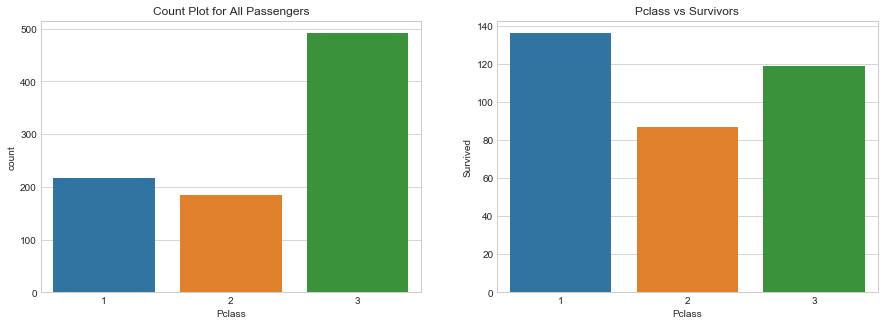

In [19]:
##Total passengers who survived in each class
pclass_sum = data_by_pclass[data_by_pclass.Survived==1].groupby(by="Pclass", as_index=False).sum()

##Plotting in a single row
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(15,5))

#Count plot
axis1.set_title("Count Plot for All Passengers")
sns.countplot(x="Pclass", data=data_by_pclass, ax=axis1)

#Survived Plot
axis2.set_title("Pclass vs Survivors")
sns.barplot(x="Pclass", y = "Survived", data=pclass_sum, ax=axis2)

The highest number of passengers are travelling in the **3rd class(491)**. But the number of people that survived is still the maximum in **1st class, at 136.** So clearly, a passenger with higher economic status had a better chance of survival.  

#### 2.1.3. Survival vs Age group 
Infants and children are the priority in the time of disaster, as they might be unable to help themselves. Even senior citizens may require some help.

In [21]:
data_by_agegroup = titanic_corrected_df[["Age Interval", "Survived"]].dropna().groupby(by="Age Interval", as_index=False)
data_by_agegroup.mean()

,Age Interval,Survived
0,"(0, 15]",0.590361
1,"(15, 30]",0.358896
2,"(30, 50]",0.423237
3,"(50, 80]",0.343750


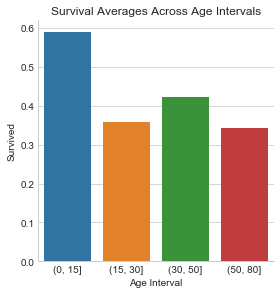

In [23]:
##Plotting averages according to age intervals
g = sns.factorplot(kind="bar",x="Age Interval", y="Survived", data=data_by_agegroup.mean())
g.ax.set_title("Survival Averages Across Age Intervals")

The age group from 0-15, i.e. **Kids**, has the highest survival rate at **59%**, validating the above assumption that children were evacuated on priority. For adults, the survival percentage is quite low, although being a little higher at 42% for middle-aged group, than the other two. A quite low number of people survived in the adult age group.

#### 2.1.4 Survival vs Embarking Point
With three embarking points- Southampton, Cherbourg and Queenstown, it can be valuable to compare the survivors from these three locations.

In [24]:
data_by_stations = titanic_df[["Embarked", "Survived"]].groupby(by="Embarked", as_index=False )
print("\nCount of total passengers from given station are: \n")
print(data_by_stations.count())
print("\nCount of survivors from each station are:\n")
print(data_by_stations.sum())
print("\nFrequencies for survivors are: \n")
print(data_by_stations.mean())


Count of total passengers from given station are: 

  Embarked  Survived
0        C       168
1        Q        77
2        S       644

Count of survivors from each station are:

  Embarked  Survived
0        C        93
1        Q        30
2        S       217

Frequencies for survivors are: 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


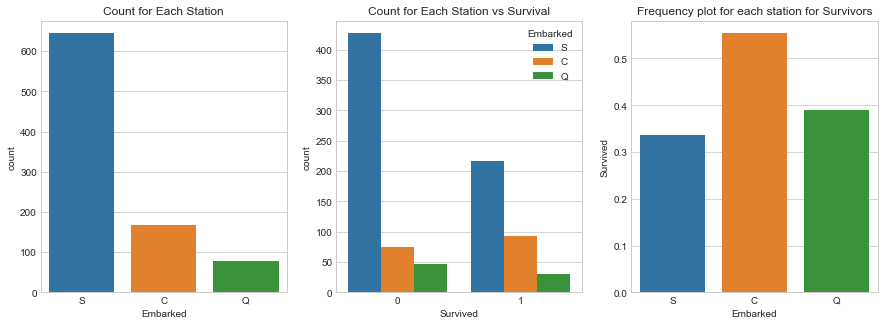

In [25]:
##Visual Depiction of above provided data

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

#Count plot for each station
sns.countplot(x="Embarked", data=titanic_corrected_df, ax=ax1)
ax1.set_title("Count for Each Station")
##Plot for count of people embarking from each station, according to survival
sns.countplot(x="Survived", hue="Embarked", data=titanic_corrected_df, ax=ax2)
ax2.set_title("Count for Each Station vs Survival")
##Frequencies of people who survived from each station
ax3.set_title("Frequency plot for each station for Survivors")
sns.barplot(x='Embarked', y='Survived', data=data_by_stations.mean(),order=['S','C','Q'], ax=ax3)

Though the number of passengers embarking from Southampton were the highest at 644, it has the **lowest survival percentage at only 33%**. The embarking station at **Cherbourg has the highest survivor percentage at around 55%**.

#### 2.1.5 Pclass vs  Fare
Comparison to see the correlation between Pclass and fare. Higher class generally implies higher ticket fares.

In [30]:
##Data by fare
data_by_fare = titanic_corrected_df[["Fare","Pclass"]]
data_by_fare.groupby(['Pclass']).describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

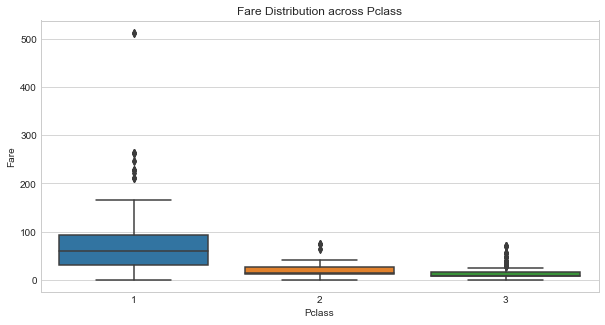

In [31]:
##Visualizations
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Fare Distribution across Pclass")
sns.boxplot(y="Fare",x="Pclass",data=data_by_fare, ax=ax)

It is clear that higher the class, higher is the fare. All three classes have 0 as the minimum fare, so it implies passengers having free travel vouchers, with Titanic being on its maiden voyage. Class 3 has the lowest fares in the range of 7 to 15, Class 2 having a range of 13 to 26, and 1st class being in the range of 30 to 94. The maximum fare is around 512, which lies in the 1st class, obviously.<br>
*All ranges are taken as Inter Quartile Ranges, not taking into account the outliers.*

### 2.2 Inter-category Analysis (multi-dimensional) 

#### 2.2.1 Survival vs Age & Sex  

Since 74% survival rate was seen for females, *which is quite high*, it is worthwhile to find out if age affected the proportions of their survival.

In [32]:
##Some functions for specific factor analysis
##Age Wise
def age_wise_data(dataframe):
    age_data = dataframe[["Age Interval", "Survived"]].groupby(by="Age Interval", as_index=False)
    return age_data
##Embarking Station Wise
def station_wise_data(dataframe):
    station_data = dataframe[["Embarked", "Survived"]].groupby(by="Embarked" , as_index=False)
    return station_data

Female Survival Data:

  Age Interval  Survived
0      (0, 15]  0.651163
1     (15, 30]  0.747826
2     (30, 50]  0.779070
3     (50, 80]  0.941176

Male Survival Data:

  Age Interval  Survived
0      (0, 15]  0.525000
1     (15, 30]  0.146919
2     (30, 50]  0.225806
3     (50, 80]  0.127660


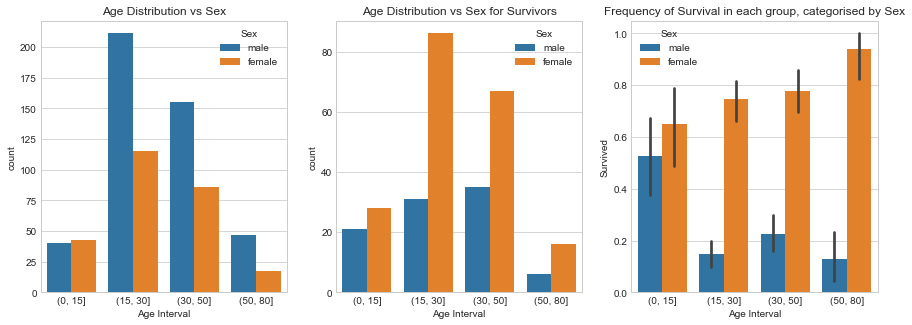

In [33]:
##Grouping by female passengers
female_passengers = titanic_corrected_df[titanic_corrected_df.Sex=="female"]
female_age_data = age_wise_data(female_passengers).mean()
print("Female Survival Data:\n")
print(female_age_data)

##Grouping for male passengers
male_passengers = titanic_corrected_df[titanic_corrected_df.Sex=="male"]
male_age_data = age_wise_data(male_passengers).mean()
print("\nMale Survival Data:\n")
print(male_age_data)

##All passengers with no grouping
passengers = titanic_corrected_df[["Sex","Age Interval","Survived"]]

##Visual Representation
fig2, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(15,5))
axis1.set_title("Age Distribution vs Sex")
sns.countplot(x="Age Interval", hue="Sex", data=titanic_corrected_df, ax=axis1)
axis2.set_title("Age Distribution vs Sex for Survivors")
sns.countplot(x="Age Interval", hue="Sex", data=titanic_corrected_df[titanic_corrected_df.Survived==1],\
              hue_order=["male", "female"],ax=axis2)
axis3.set_title("Frequency of Survival in each group, categorised by Sex")
sns.barplot(x="Age Interval",y="Survived" ,hue="Sex", data=passengers)

The main point to be noted here is that _male survival percentage is much much lower in each age group, when compared to females_. So this can be considered as a major factor for survival.

However, contrary to our previous assumption that children tend to have the higher survival rate, irrespective of sex, the **Kids age group for females has the lowest survival numbers** amongst all females. The **senior citizen age group**, is at the top with around **94% survivors** instead. In comparison, the assumption holds true in case of males. 

#### 2.2.2 Survival vs Age and Economic Status
Economic status, as stated previously, can be determined through the class in which the passengers were travelling, i.e. *Pclass*. Distribution of passengers in each Pclass according to age, will give us an idea of the population age density, and likewise for the survivors.

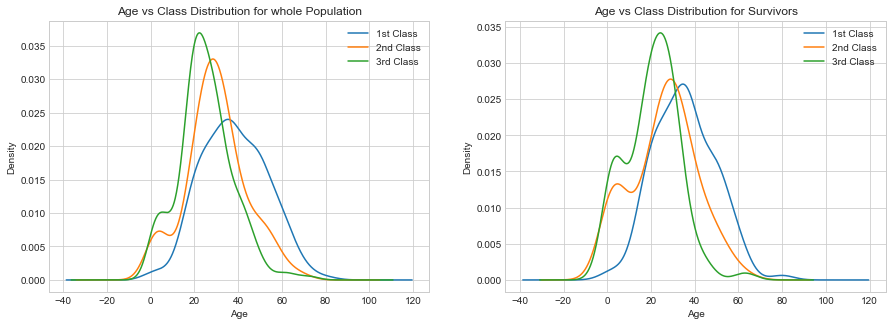

In [34]:
##Grouping Data by Pclass
age_class_data = titanic_corrected_df[["Survived","Age","Pclass"]]
age_class_data.groupby(by="Pclass", as_index=False)
age_class_data = age_class_data.dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

##Distribution plots for Age vs Economic Status
age_class_data.Age[age_class_data.Pclass==1].plot(kind="kde", ax=ax1)
age_class_data.Age[age_class_data.Pclass==2].plot(kind="kde", ax=ax1)
age_class_data.Age[age_class_data.Pclass==3].plot(kind="kde", ax=ax1)
ax1.legend(('1st Class', '2nd Class','3rd Class'), loc='best')
ax1.set_title("Age vs Class Distribution for whole Population")
ax1.set_xlabel("Age")

##Distribution plots for Age vs Economic Status for the passengers who survived
age_class_data1 = age_class_data[age_class_data.Survived==1]
age_class_data1.Age[age_class_data1.Pclass==1].plot(kind="kde", ax=ax2)
age_class_data1.Age[age_class_data1.Pclass==2].plot(kind="kde", ax=ax2)
age_class_data1.Age[age_class_data1.Pclass==3].plot(kind="kde", ax=ax2)
ax2.legend(('1st Class', '2nd Class','3rd Class'), loc='best')
ax2.set_title("Age vs Class Distribution for Survivors")
ax2.set_xlabel("Age")

Most of the passengers in each class are in the 20-40 year age margin. Same goes for the passengers who survived. 
<br>Amongst the three classes, the peak for the distribution occurs at a later point for 1st and 2nd class, i.e. more young adults(18-25 years) are present in the 3rd class.<br>A *second local maxima is also seen in 2nd and 3rd class* in the 0-10 years age range, signifying more children, and can also be called as a *bimodal distribution*. This fact also holds true for Age distribution of survivors.  

#### 2.2.3 Survival vs Family Members
Using the Sibsp and Parch, we can create a new category to check if the passenger is with family or is travelling alone. These can be merged together and analysed how being with a family affects the survival rate. 

   Has Family  Survived
0       False  0.303538
1        True  0.505650


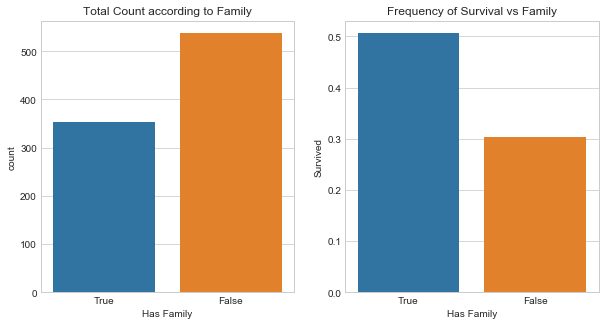

In [35]:
##Creating new dataframe to avoid changing values in original
titanic_corrected_new = titanic_corrected_df.copy()
titanic_corrected_new["Has Family"] = titanic_corrected_new["SibSp"] + titanic_corrected_new["Parch"] > 0
titanic_corrected_new.drop(["SibSp","Parch"], axis="columns")

##Grouping by Family
data_by_family = titanic_corrected_new[["Has Family","Survived"]].groupby(by="Has Family", as_index=False)
print(data_by_family.mean())

##Visualisation
fig4, (axis1,axis2) = plt.subplots(1,2, figsize=(10,5))

axis1.set_title("Total Count according to Family")
sns.countplot(x="Has Family", data=titanic_corrected_new, order=[True, False], ax=axis1)
axis2.set_title("Frequency of Survival vs Family")
sns.barplot(x="Has Family", y="Survived", data=data_by_family.mean(), order=[True, False], ax=axis2)

It is quite evident that passengers having family members had a higher chance of survival. While the number of passengers travelling alone is higher than the ones with family, the rate of survival could be higher for families as they might have stuck together while evacuating, hence increasing the chances of whole family surviving together. This definitely does not imply causation though, because some members of a family might not have survived, while others may have.

#### 2.2.4 Survivors vs Economic Status and Embarking Stations
Fare distribution and Pclass's across embarking stations may help us analyze the crowd which boarded from each station.

In [36]:
##Comparison through Fare
data_by_fare_station = titanic_corrected_df[["Fare","Embarked"]].groupby(['Embarked'])
data_by_fare_station.describe()

Fare                                                            \
          count       mean        std     min       25%    50%        75%   
Embarked                                                                    
C         168.0  59.954144  83.912994  4.0125  13.69795  29.70  78.500025   
Q          77.0  13.276030  14.188047  6.7500   7.75000   7.75  15.500000   
S         644.0  27.079812  35.887993  0.0000   8.05000  13.00  27.900000   

                    
               max  
Embarked            
C         512.3292  
Q          90.0000  
S         263.0000

In [37]:
##Similar comparison for survivors
survivors_by_fare_station = pd.DataFrame(data=titanic_corrected_df[titanic_corrected_df.Survived==1],columns=["Fare", "Embarked"])
survivors_by_fare_station.groupby(["Embarked"]).describe()

Fare                                                            \
          count       mean        std     min      25%       50%      75%   
Embarked                                                                    
C          93.0  79.720926  99.582717  7.2250  19.2583  56.92920  89.1042   
Q          30.0  13.182227  15.371167  7.7333   7.7500   7.80835  12.3500   
S         217.0  39.547081  45.427680  0.0000  12.6500  26.00000  52.0000   

                    
               max  
Embarked            
C         512.3292  
Q          90.0000  
S         263.0000

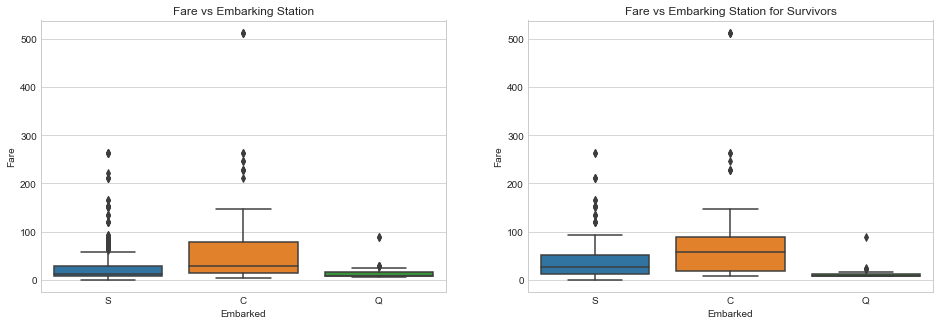

In [38]:
##Visualizations for survivors and non-survivors, exploring above stated relationship
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
sns.boxplot(x="Embarked", y="Fare", data=titanic_corrected_df, order=["S","C","Q"],ax=ax1)
sns.boxplot(x="Embarked", y="Fare", data=survivors_by_fare_station, order=["S","C","Q"], ax=ax2)
ax2.set_title("Fare vs Embarking Station for Survivors")
ax1.set_title("Fare vs Embarking Station")

While the number of passenger embarking from Queenstown were quite less in comparison to the other two, the overall fare distribution was also very small here. The maximum value is around 90 for Queenstown, while the overall maximum fare was from Cherbourg, at around 512. The highest IQR is also from Cherbourg, while the number of outliers are mostly from Southampton. The minimum fare, is 0 across all three stations.

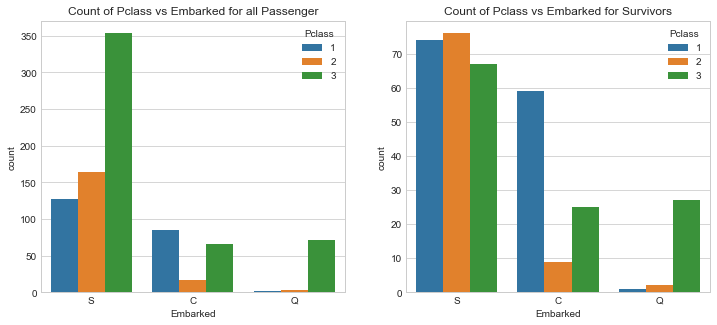

In [40]:
##Comparison with Pclass
data_by_class_station = titanic_corrected_df[["Pclass","Embarked","Survived"]]
fig, (a1,a2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Embarked", hue="Pclass", data=data_by_class_station,ax=a1, order=["S","C","Q"])
a1.set_title("Count of Pclass vs Embarked for all Passenger")
sns.countplot(x="Embarked", hue="Pclass", data=data_by_class_station[data_by_class_station.Survived==1],ax=a2,\
              order=["S","C","Q"])
a2.set_title("Count of Pclass vs Embarked for Survivors")

## 3. Limitations

* Since we know that the data present in the dataset is not quite complete(around 2000 people were aboard the Titanic when the disaster struck), we cannot be fully sure if the above analysis is accurate. Data for more than 50% of the total riders is not available, and that greatly affects any correlations/trends that one may have had predicted through this analysis. For example, one of the analysis where children in female category have lower survival frequency than all other age groups seems to be incorrect. Insufficient data may be the reason for this. A generalisation for all the passengers cannot be made through this analysis.

* Many a values are missing in the dataset, such as age, cabins etc.. Age is actually a major parameter that has been analysed throughout this report, and it is done so through only 714 values available out of 891 passengers. The unavailable values can either be assumed, or predicted, but either way, the outcome may not necessarily be correct. Similarly, the parameter cabin, cannot be analysed since a lot of values are missing from the dataset. So it is actually wasted.

* Duplicate data is present in the ticket column. It only has around 681 unique values. This may not be a limitation, but since no documentation is provided regarding the authenticity or purpose of same ticket number, this data cannot be faithfully analysed. Assumptions in this case may only lead to wasted efforts without any fruitful inferences.

* More information regarding the passengers could've been provided, such as Profession, address etc.. Although not directly answering the main question, these parameters may act as secondary information which may have influenced a person's survival at that point of time. A good example of that would be profession, i.e. someone like an athlete, soldier etc. may have a higher chance of survival due to physical fitness and ability to strive in dangerous situations.

## 4. Conclusions

The analysis can be summarised in a few points as follows:
* Only around 38% (342) people survived out of 891 passengers, whose data is available to us.
* **The chances of survival of females are seen to be higher**, across all age groups when compared to male passengers. *This can be termed as an outcome of survival of women being given priority while in such situation.*
* In terms of age, **children have the highest survival percentage overall**, but this is not so in the case of females. Amongst females, passengers in the age group of 50-80 years were most likely to survive the disaster. *Children, and elders are the ones who might need help evacuating during such crisis.* But, the fact that survival rates were lowest in case of women doesn't sit right with the trend, possibly because of *limited data being available for all passengers.*
* Passengers travelling in the **1st class, are more likely to be evacuated first**. The highest casualties are from the third class. This is correlated with their ticket fares(as it is analogous to Pclass) as well.
* **Family members are seen to have a higher survival rate in comparison to passengers travelling alone**. But this in any way doesn't imply a causation. There might've been many uncontrollable and unexplorable factors, leading to such a statistic.
* **Southampton station, though having the largest number of passengers boarding from it, has lowest survival percentage**. *This as well doesn't imply a causation.* **Percentage survival is highest for Cherbourg.**
* **Queenstown seems to be the poorest town** of the three, as a relatively low number of people have embarked from there, that too mostly in 3rd class, with very low fares.


## 5. Resources Used

[**Seaborn Documentation**](https://seaborn.pydata.org/index.html)<br>
[**Kaggle Titanic Dataset Webpage**](https://www.kaggle.com/c/titanic)<br>
[**Stackoverflow Website**](https://stackoverflow.com/)<br>
[**Data Visualization Catalogue**](http://www.datavizcatalogue.com/index.html)<br>
[**Pandas v0.23 Documentation**](https://pandas.pydata.org/pandas-docs/stable/index.html)<br>
[**Choosing the best Graph Type**](http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/datapresentation/DataPresentation7.html)<br>
[**Tutorial for Seaborn**](http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/)<br>
[**Matplotlib Documentation**](https://matplotlib.org/)
